# 영상입력 다중클래스분류모델(다층퍼셉트론 신경말 모델)
- 영상을 입력해서 다중클래스를 분류할 수 있는 모델 생성. 
- 숫자 손글씨 데이터셋인 MNIST을 이용하여 다층퍼셉트론 및 컨볼루션 신경망 모델을 구성
- 적용 분야 
    - 동양인 얼굴 사진으로 한국인, 일본인, 중국인 구분
    - 현미경 촬영 영상으로부터 다양한 균 구분
    - 스마트폰으로 찍은 식물 종류 구분
    - 기상위성영상으로부터 태풍 타입 분류

### 사용할 패키지 선언 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

* 이미지 크기

In [2]:
width = 28
height = 28

### 1. 데이터셋 생성하기
- 초기 라벨값은 0에서 9까지 정수로 지정
- 데이터 정규화를 위해서 255.0으로 나눔

#### 훈련셋과 시험셋 불러오기

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

#### 훈련셋과 검증셋 분리

In [4]:
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

#### 데이터셋 전처리 : one-hot 인코딩 

In [5]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

### 2. 모델 구성하기

In [6]:
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))    # 10개의 결과중에 하나를 선택하는 경우 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


### 3. 모델 학습과정 설정하기

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### 4.모델 학습시키기

In [9]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6886 - accuracy: 0.8224 - val_loss: 0.3014 - val_accuracy: 0.9113
Epoch 2/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2766 - accuracy: 0.9201 - val_loss: 0.2169 - val_accuracy: 0.9364
Epoch 3/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2186 - accuracy: 0.9359 - val_loss: 0.1861 - val_accuracy: 0.9471
Epoch 4/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1819 - accuracy: 0.9476 - val_loss: 0.1576 - val_accuracy: 0.9548
Epoch 5/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1541 - accuracy: 0.9546 - val_loss: 0.1425 - val_accuracy: 0.9616
Epoch 6/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1343 - accuracy: 0.9608 - val_loss: 0.1299 - val_accuracy: 0.9629
Epoch 7/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1178 - accuracy: 0.9657 - val_loss: 0.1165 - val_accuracy:

### 5. 학습과정 살펴보기

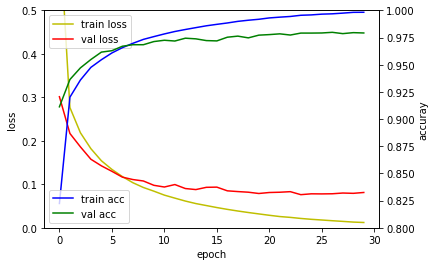

In [10]:
%matplotlib inline

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()                                        # loss_ax와 함께 acc_ax 그래프 같이 표현 

# loss 에 대한 그래프 
loss_ax.plot(hist.history['loss'], 'y', label='train loss')     # 노란색 선 
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')   # 빨간색 선 
loss_ax.set_ylim([0.0, 0.5])                                    # Y축 값 

# acc 에 대한 그래프 
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')   # 파란색 선 
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc') # 녹색 선 
acc_ax.set_ylim([0.8, 1.0])

# x, y 축에 라벨 붙이기 
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

# 범례 보이기 
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 6. 모델 평가하기

In [11]:
loss, metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ', loss)
print('metrics : ', metrics)

313/313 [==============================] - 0s 1ms/step - loss: 0.0758 - accuracy: 0.9788
loss :  0.07575663179159164
metrics :  0.9787999987602234


### 7. 모델 사용하기

In [12]:
yhat_test = model.predict(x_test, batch_size=32)

#### 데이터 셋 일부 확인하기

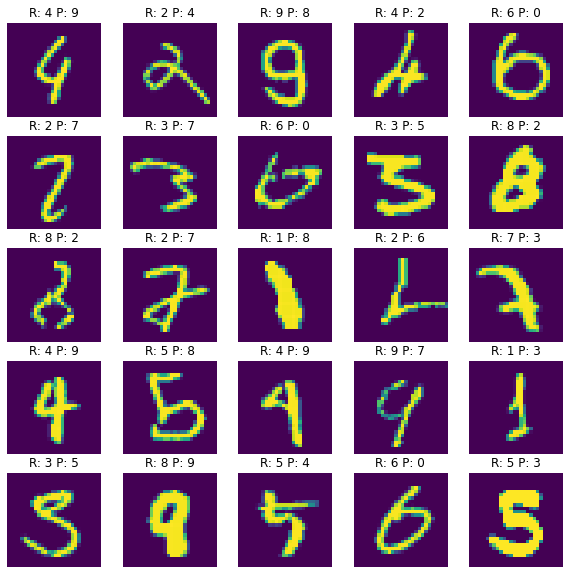

In [22]:
%matplotlib inline
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)
f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row * plt_col):
    
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
     
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)
    
    i += 1
    cnt += 1
    
plt.show()